In [1]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

import matplotlib.pyplot as plt

Pandas   1.2.3
Sklearn  0.24.1


In [2]:
df=pd.read_csv("movies_utf8.csv",encoding="utf8")

In [3]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016


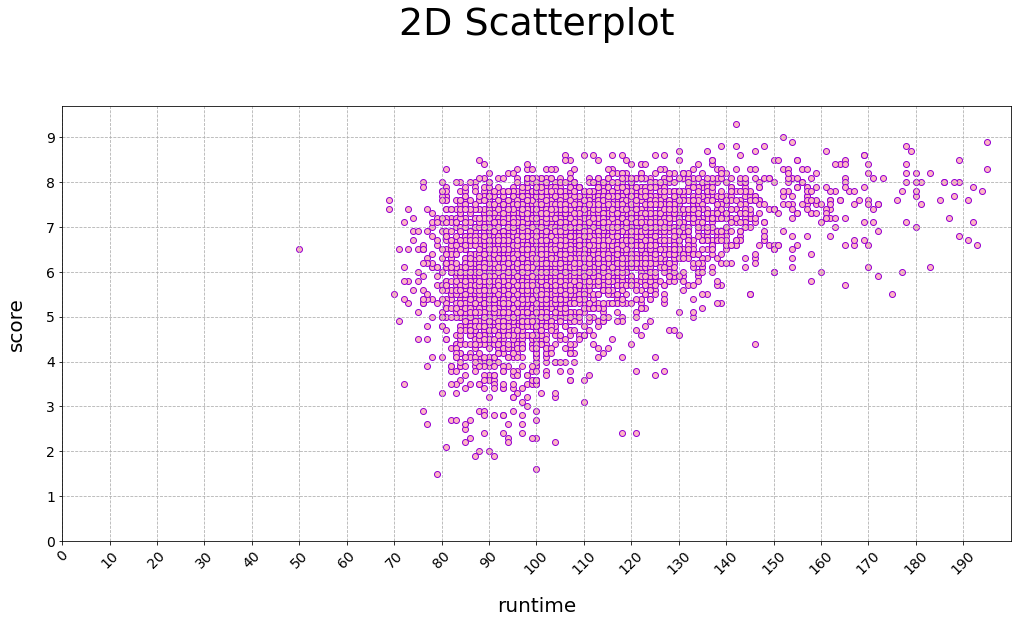

In [4]:
# 1 
fig, ax = plt.subplots(figsize=(17,8))
plt.scatter(df['runtime'],df['score'],
            label = 'Movies',
            color = 'lightpink', 
            edgecolor = 'darkviolet')
plt.xlabel('runtime', fontsize=20,labelpad=20)
plt.ylabel('score', fontsize=20,labelpad=20)
plt.title('2D Scatterplot', fontsize=38,y=1.15)
plt.xlim(0,200)
plt.xticks(np.arange(0,200,10),fontsize=14, rotation=45)
plt.yticks(np.arange(0,max(df['score']),1),fontsize=14)
plt.grid(True,linestyle='dashed')
plt.show()



In [5]:
df.gross.max()

936662225.0

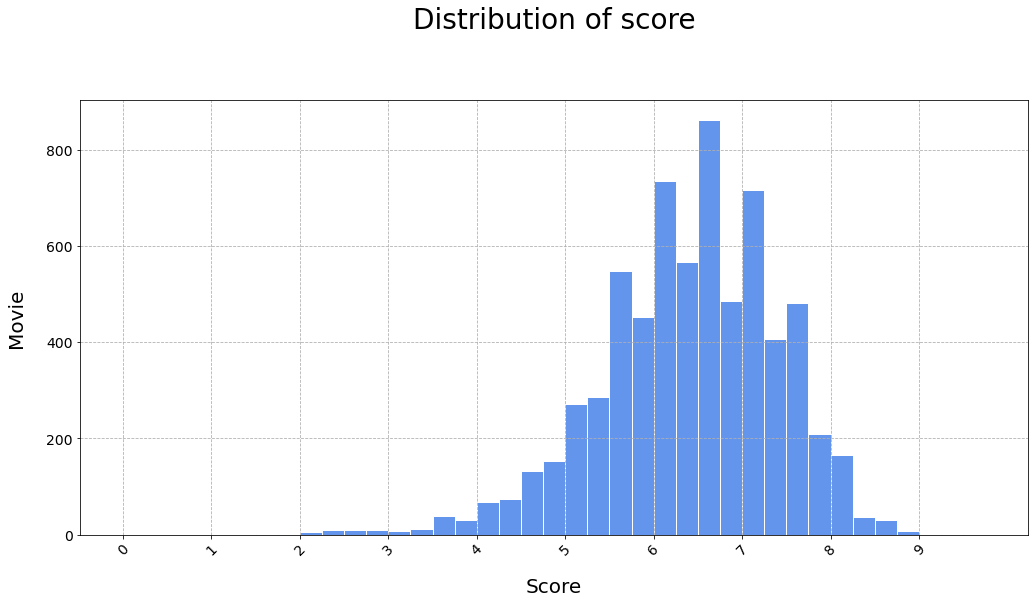

In [6]:
fig, ax = plt.subplots(figsize=(17,8))
plt.hist(df.score, 
         bins = np.arange(0,10,0.25), ## change for a better bin scale
         color='cornflowerblue',
         edgecolor = "white")
plt.xticks(np.arange(0,10,1),fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Score", fontsize=20,labelpad=20)
plt.ylabel("Movie", fontsize=20,labelpad=20)
plt.title('Distribution of score', fontsize=28,y=1.15)

plt.grid(True,linestyle='dashed')
plt.show()

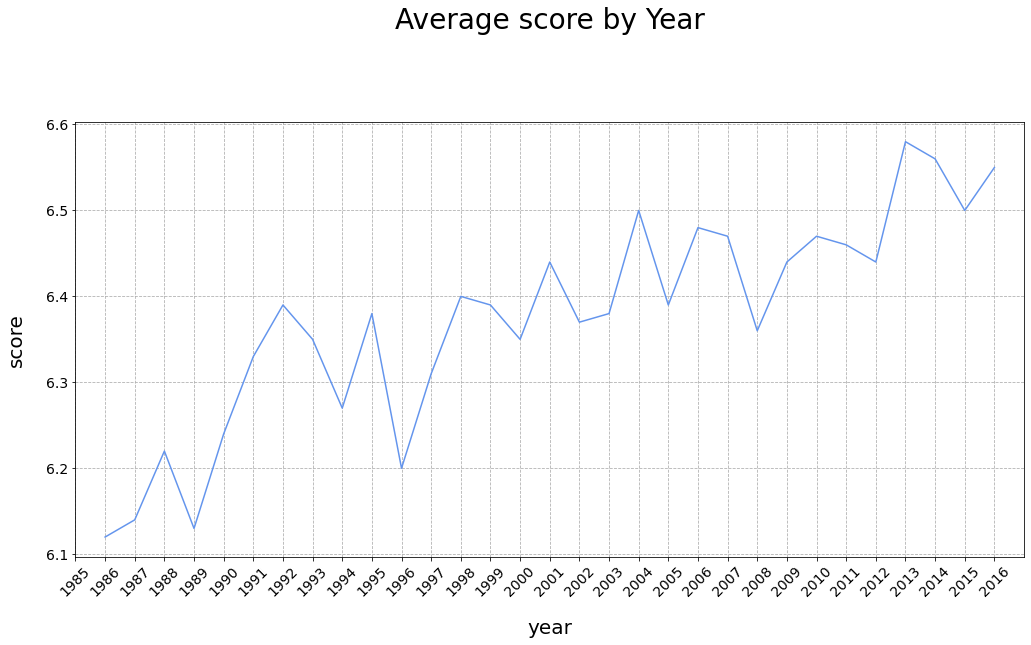

In [7]:
year_minmax=df.groupby("year")['score'].mean().round(decimals=2)
fig, ax = plt.subplots(figsize=(17,8))
plt.plot(year_minmax,color='cornflowerblue')

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xticks(np.arange(1985,2017,1),fontsize=14, rotation=45)
plt.xlabel("year", fontsize=20,labelpad=20)
plt.ylabel("score", fontsize=20,labelpad=20)
plt.title('Average score by Year', fontsize=28,y=1.2)
plt.grid(True,linestyle='dashed')
plt.xlim(1985,2017)
plt.show()

In [8]:
X = df.drop(columns=['name','released','gross']) # X DATA (WILL BE TRAIN+VALID DATA)
y = df["gross"] #

In [25]:
y.sort_values(ascending=False)

6380    936662225.0
5061    760507625.0
2420    658672302.0
6391    652270625.0
5723    623357910.0
           ...     
5917          547.0
5699          542.0
6066          441.0
2594          309.0
6784           70.0
Name: gross, Length: 6820, dtype: float64

In [23]:
gross_bins = ["0-1000","1000-10000","10000-100000","1000000-10000000","10000000-100000000","100000000-1000000000"]

70.0

In [33]:
test = int(20000)
if (test > 1000) & (test < 10000):
    test = "1000-10000"
print(test)

20000


In [50]:
y_new = []
for item in y:
    if item <= 1000:
        y_new.append("0-1000")
    elif ((item > 1000 ) and (item <= 10000)):
        y_new.append("1000-10000")
    elif ((item > 10000 ) and (item <= 100000)):
        y_new.append("10000-100000")
    elif ((item > 100000 ) and (item <= 1000000)):
        y_new.append("100000-1000000")
    elif ((item > 1000000 ) and (item <= 10000000)):
        y_new.append("1000000-10000000")
    elif ((item > 10000000 ) and (item <= 100000000)):
        y_new.append("10000000-100000000")
        

In [63]:
y_new

['10000000-100000000',
 '10000000-100000000',
 '10000000-100000000',
 '10000000-100000000',
 '10000000-100000000',
 '1000000-10000000',
 '10000000-100000000',
 '10000000-100000000',
 '1000000-10000000',
 '1000000-10000000',
 '10000000-100000000',
 '1000000-10000000',
 '1000000-10000000',
 '1000000-10000000',
 '10000000-100000000',
 '1000000-10000000',
 '10000000-100000000',
 '10000000-100000000',
 '10000000-100000000',
 '1000000-10000000',
 '10000000-100000000',
 '10000000-100000000',
 '1000000-10000000',
 '10000000-100000000',
 '10000000-100000000',
 '1000000-10000000',
 '10000000-100000000',
 '10000000-100000000',
 '1000000-10000000',
 '10000000-100000000',
 '10000000-100000000',
 '1000000-10000000',
 '1000000-10000000',
 '10000000-100000000',
 '10000000-100000000',
 '10000000-100000000',
 '10000000-100000000',
 '1000000-10000000',
 '1000000-10000000',
 '1000000-10000000',
 '10000000-100000000',
 '10000000-100000000',
 '1000000-10000000',
 '10000000-100000000',
 '10000000-100000000',

In [70]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
result = enc.fit_transform(y_new)

ValueError: Expected 2D array, got 1D array instead:
array=['10000000-100000000' '10000000-100000000' '10000000-100000000' ...
 '1000000-10000000' '10000-100000' '10000-100000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [67]:


enc.categories_
enc.transform(gross_enc)

ValueError: Expected 2D array, got 1D array instead:
array=['10000000-100000000' '10000000-100000000' '10000000-100000000' ...
 '1000000-10000000' '10000-100000' '10000-100000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [54]:
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [55]:
cat_vars  = ["company","country","director","genre","rating","star","writer"]       # x.select_dtypes(include=[object]).columns.values.tolist()
num_vars  = ['score', 'runtime', 'votes', 'year'] # x.select_dtypes(exclude=[object]).columns.values.tolist()

print("\nNumerical features:\n", num_vars)
print("\nCategorical features:\n", cat_vars)


Numerical features:
 ['score', 'runtime', 'votes', 'year']

Categorical features:
 ['company', 'country', 'director', 'genre', 'rating', 'star', 'writer']


In [56]:
# YOUR CODE HERE
num_4_treeModels = pipeline.Pipeline(steps=[
  ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=False))
])

cat_4_treeModels = pipeline.Pipeline(steps=[
  ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
  ('ordinal', preprocessing.OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=99999999)) 
  # ('ordinal', preprocessing.OrdinalEncoder(categories='auto', handle_unknown='ignore'))
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_treeModels, num_vars),
    ('cat', cat_4_treeModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

In [57]:
num_4_multi_models = pipeline.Pipeline(steps=[
  ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=False)),
  ('scaler',  preprocessing.StandardScaler())
])

cat_4_treeModels = pipeline.Pipeline(steps=[
  ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
  ('onehot', preprocessing.OneHotEncoder(categories='auto', handle_unknown='ignore')) 
]) #handle_unknown='use_encoded_value', unknown_value=99999999 --> what is this ?

multi_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_multi_models, num_vars),
    ('cat', cat_4_treeModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

multi_prepro

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['score', 'runtime', 'votes', 'year']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['company', 'country', 'director', 'genre',
                                  'rating', 'star', 'writer'])])

In [58]:
num_4_treeModels
num_4_multi_models

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [59]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:


# YOUR CODE HERE
#we dont need scaling/norm for these models
#ordinal encoding (sometimes binary) for categorical 
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":ExtraTreesClassifier(),
  "Random Forest":RandomForestClassifier()
}

#we need to do scaling/norm for these models
#one hot encoding for categorical
num_classifiers = {
    "Logistic Regression": LogisticRegression(),
}


tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
multi_models = {name: pipeline.make_pipeline(multi_prepro, model) for name, model in num_classifiers.items()}


tree_classifiers["Decision Tree"]
multi_models["Logistic Regression"]



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['score', 'runtime', 'votes',
                                                   'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['company', 'country',
                                                   'director', 'genre',
                                                   'rating', 'star',
                                                   'writer'])])),
                ('logisticregression', LogisticRegression())])

In [62]:
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

# YOUR CODE HERE
#tree model
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    X, y,
    test_size=0.2,
    stratify = y,   
    random_state=42,
)

for model_name, model in tree_classifiers.items():

    start_time = time.time()
    model.fit(x_train, y_train) #fit transforms in fit for train data.
    total_time = time.time() - start_time
    
    pred = model.predict(x_val)  #transforms test data here (inside predict)
    
    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

ValueError: Found input variables with inconsistent numbers of samples: [6820, 6207]

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_predict

skf = model_selection.StratifiedKFold( #This cross-validation object is a variation of KFold that 
    #returns stratified folds.The folds are made by preserving the percentage of samples for each class.
    n_splits= 10,
    shuffle=True,
    random_state = 42
)

results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})


for model_name, model in tree_classifiers.items():

    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
    
    pred = cross_val_predict(model, x_val, y_val, cv=skf)
    pred = model.predict(x_val) 
    
    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')